<a href="https://colab.research.google.com/github/Vynogradova/homework/blob/main/Homework_10_%22%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [4]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

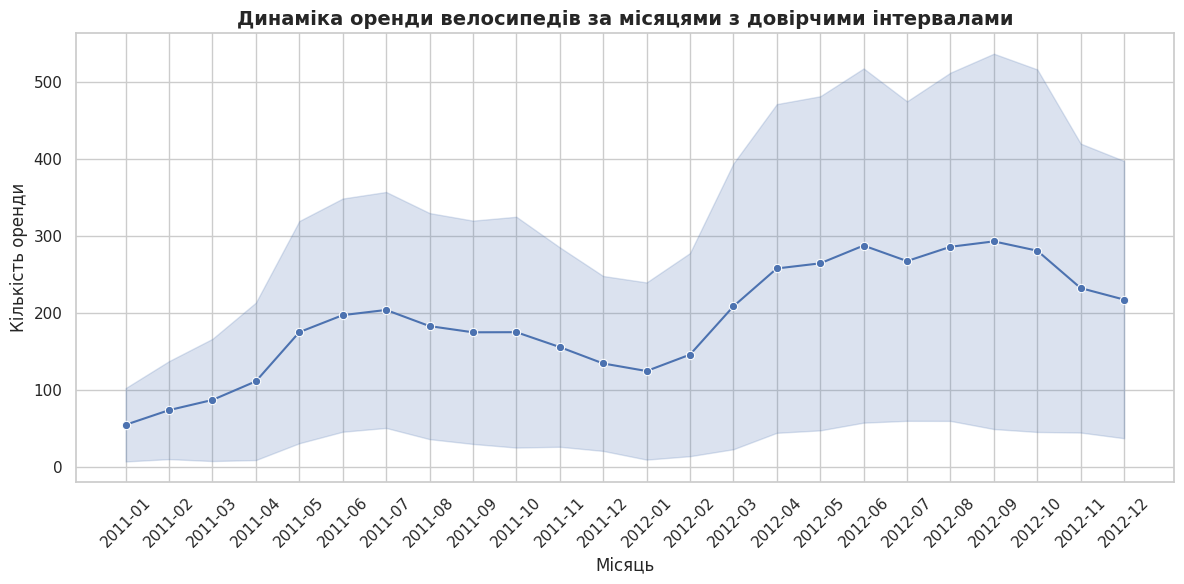

In [6]:
df['month_year'] = df.index.to_period('M').astype(str)

# Побудова графіка з оновленим параметром errorbar='sd'
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month_year', y='count', errorbar='sd', marker='o')

# Оформлення
plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами', fontsize=14, fontweight='bold')
plt.xlabel('Місяць', fontsize=12)
plt.ylabel('Кількість оренди', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Місяці з найбільшою невизначеністю:

- 2011-06

- 2012-04

- 2012-05

- 2012-06

- 2012-09

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

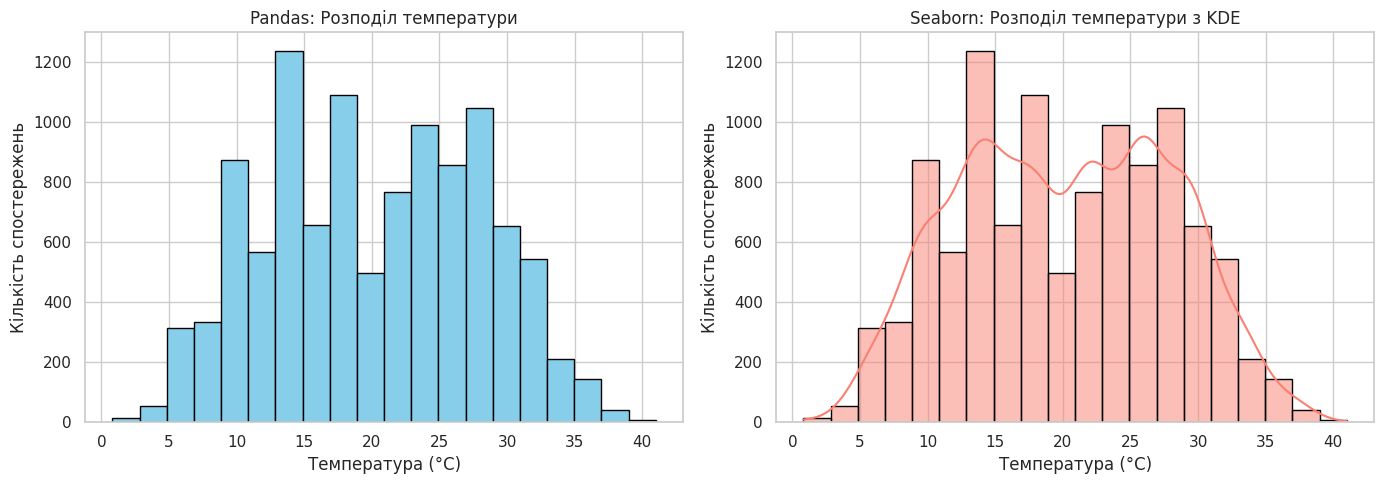

In [7]:
# Налаштування фігури
plt.figure(figsize=(14, 5))

# Параметри
bins = 20

# 1. Гістограма з Pandas
plt.subplot(1, 2, 1)
df['temp'].plot(kind='hist', bins=bins, edgecolor='black', color='skyblue')
plt.title('Pandas: Розподіл температури')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість спостережень')

# 2. Гістограма з Seaborn
plt.subplot(1, 2, 2)
sns.histplot(df['temp'], bins=bins, kde=True, color='salmon', edgecolor='black')
plt.title('Seaborn: Розподіл температури з KDE')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість спостережень')

plt.tight_layout()
plt.show()

#Яка візуальна різниця між Pandas та Seaborn гістограмами?
Pandas - простий, менш налаштований, має тільки стовпці гістограми, менше опцій для статистичних функцій.

Seaborn - більш сучасний, має стовпці + додаткова гладка лінія, більше опцій, зокрема kde=True

#Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?
KDE — це гладка лінія, яка показує, як розподілені дані в просторі. Вона ніби "згладжує" стовпчики гістограми, дозволяючи краще побачити форму розподілу:

- де є піки (багато значень),

- де "ями" (мало значень),

- наскільки рівномірно розподілені значення.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

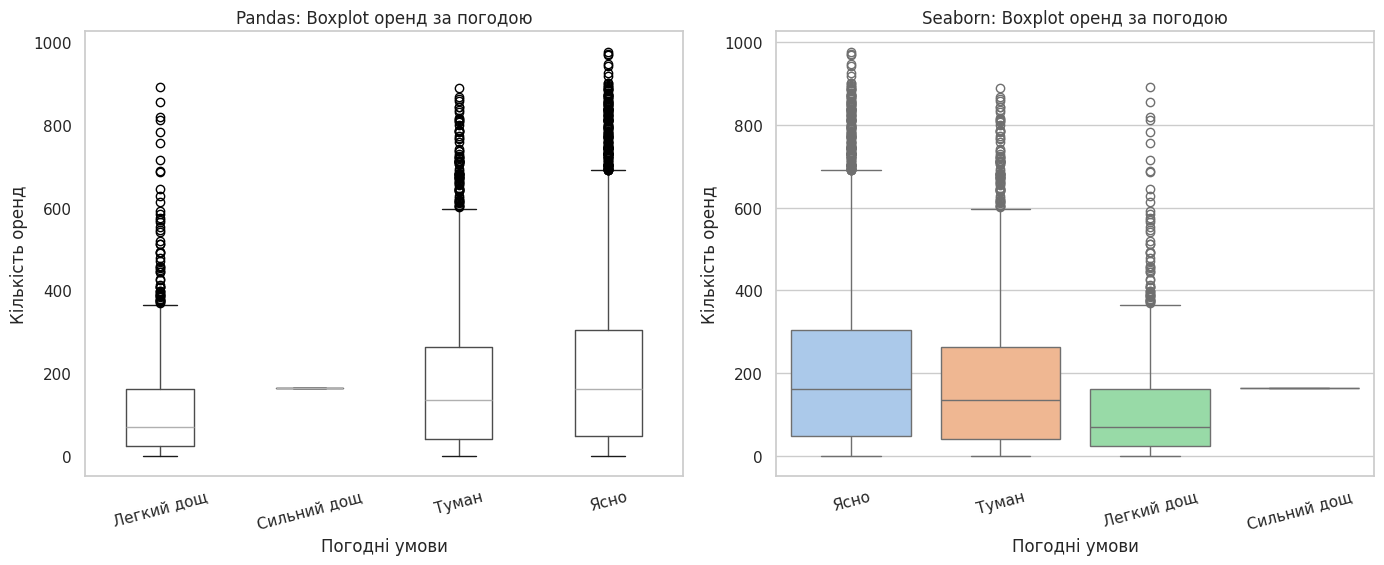

In [11]:
# Створення словника для описів погоди
weather_map = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
# Додаємо колонку з описом
df['weather_desc'] = df['weather'].map(weather_map)

# Створюємо фігуру з двома subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pandas boxplot
df.boxplot(column='count', by='weather_desc', ax=axes[0], grid=False)
axes[0].set_title("Pandas: Boxplot оренд за погодою")
axes[0].set_xlabel("Погодні умови")
axes[0].set_ylabel("Кількість оренд")
axes[0].tick_params(axis='x', rotation=15)

# Seaborn boxplot
sns.boxplot(data=df,x='weather_desc',y='count',hue='weather_desc',ax=axes[1],palette='pastel',legend=False)
axes[1].set_title("Seaborn: Boxplot оренд за погодою")
axes[1].set_xlabel("Погодні умови")
axes[1].set_ylabel("Кількість оренд")
axes[1].tick_params(axis='x', rotation=15)

plt.suptitle("")  # Видаляємо заголовок, який Pandas автоматично додає
plt.tight_layout()
plt.show()

#Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

Pandas — простий і базовий вигляд: чорно-білий, без кольору. Обмежений у візуальних налаштуваннях.

Seaborn — яскравий, сучасний стиль: додає кольори автоматично, виглядає більш привабливо. Дозволяє легко додавати стилі, палітри, сортування, розділення тощо.

Seaborn підходить, якщо потрібна красива та настроювана візуалізація, а Pandas — коли потрібно швидко глянути на дані.


<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


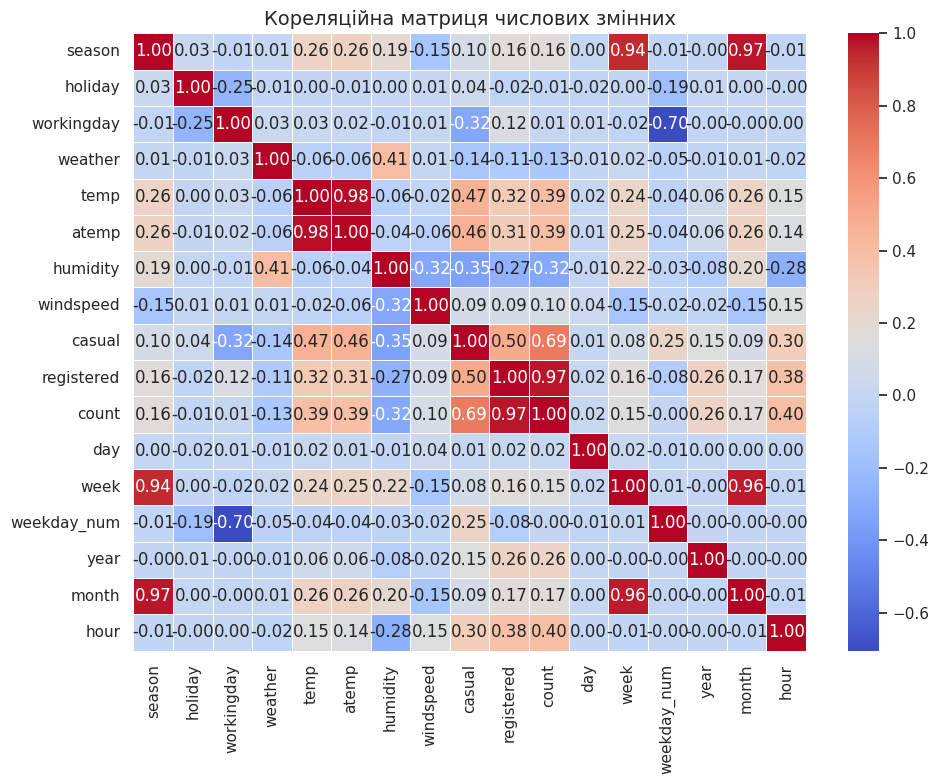

In [12]:
# Обираємо тільки числові змінні
numeric_df = df.select_dtypes(include='number')

# Розрахунок кореляційної матриці
corr_matrix = numeric_df.corr()

# Побудова heatmap з анотаціями
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Кореляційна матриця числових змінних", fontsize=14)
plt.tight_layout()
plt.show()

#Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
- registered — 0.97
- temp — 0.39
- atemp — 0.39
- casual — 0.67

Найсильніший зв'язок — з кількістю зареєстрованих користувачів. Це логічно: чим більше зареєстрованих, тим більше оренд.
#Яка кореляція між temp та atemp? Чому?
- Кореляція = 0.98 — дуже сильна.

Це очікувано, бо atemp — це “відчутна” температура, і вона майже завжди слідує за реальною температурою temp.
#Які змінні мають негативну кореляцію?
- humidity та count — (-0.06) (слабка, але негативна)
- windspeedтаcasual — (-0.32)
- windspeedтаcount — (-0.03)
- weatherтаcount' — (-0.39)

Це означає, що при гіршій погоді (вище значення weather), вищій вологості та сильнішому вітрі — кількість оренд знижується.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


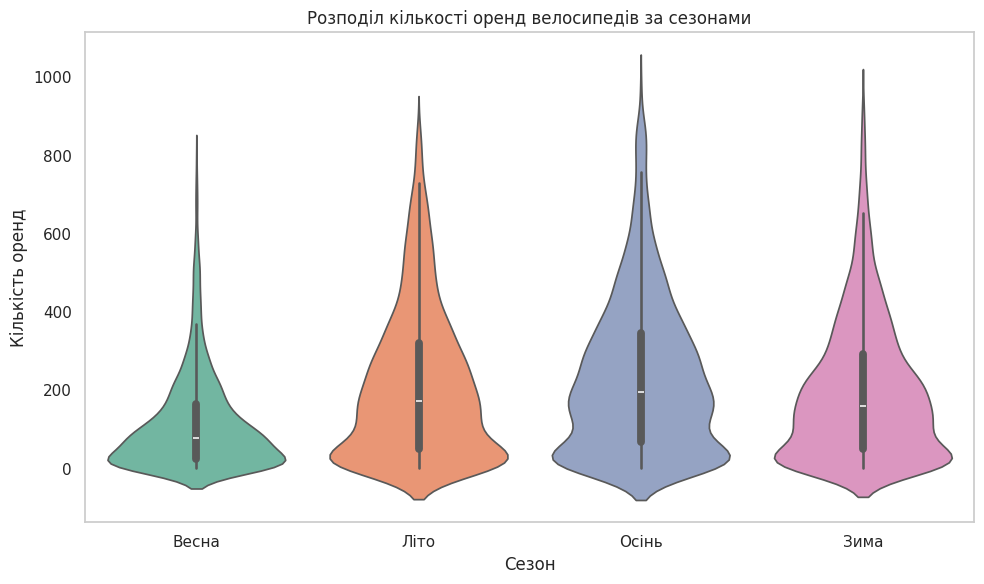

In [14]:
# Створюємо мапінг для сезонів (для кращої читабельності)
season_mapping = {
    1: 'Весна',
    2: 'Літо',
    3: 'Осінь',
    4: 'Зима'
}
df['season_label'] = df['season'].map(season_mapping)

# Побудова violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='season_label', y='count', hue='season_label', palette='Set2', legend=False)

# Підпис графіка
plt.title('Розподіл кількості оренд велосипедів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Що показує "товщина" violin plot?
Товщина показує, cкільки значень спостерігається на певному рівні (кількості оренд).
- Товстіше = більше спостережень з такою кількістю оренд.
- Тонше = менше даних у цій області.
#В якому сезоні найбільша варіабельність оренди?
Найбільшу варіабельність видно у літній сезон (Літо).
- у нього широкий діапазон значень — від майже 0 до понад 900.
- розподіл дуже розтягнутий, із багатьма орендами як у низькому, так і в дуже високому діапазоні.
#Яка перевага violin plot над звичайним box plot?
Violin plot = boxplot + щільність розподілу.
Переваги:

- Бачимо форму розподілу (симетрія, скупчення, кілька піків).

- Помітні аномалії (наприклад, чи є різкі стрибки, або кілька мод).

- Детальніше, ніж boxplot, бо boxplot показує тільки медіану, квартили й викиди.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

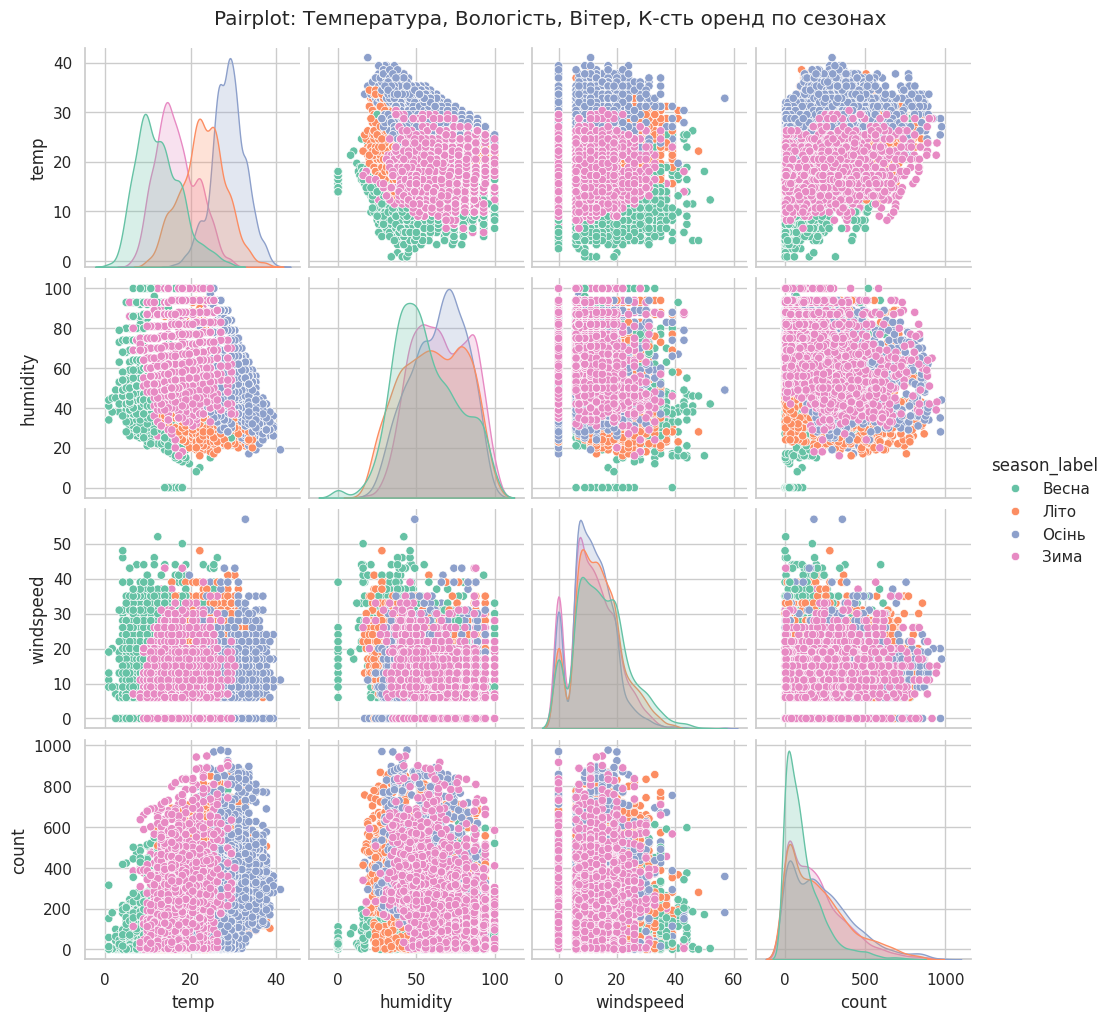

In [15]:
sns.pairplot(df, vars=['temp', 'humidity', 'windspeed', 'count'], hue='season_label', palette='Set2')
plt.suptitle('Pairplot: Температура, Вологість, Вітер, К-сть оренд по сезонах', y=1.02)
plt.show()

#Між якими змінними спостерігається найсильніший лінійний зв'язок?
temp та count — найбільш очевидна лінійна залежність:

Чим вища температура, тим більше оренд. На графіку — чіткий висхідний тренд, незалежно від сезону.
#Яка характеристика найбільше змінюється від сезону?
temp (температура) — найсильніше залежить від сезону:

Кожна крива на діагоналі temp має свою "горбату" форму для кожного сезону (весна, літо, осінь, зима).

Температура чітко групується за сезонами, що видно як розділені ділянки на графіку.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

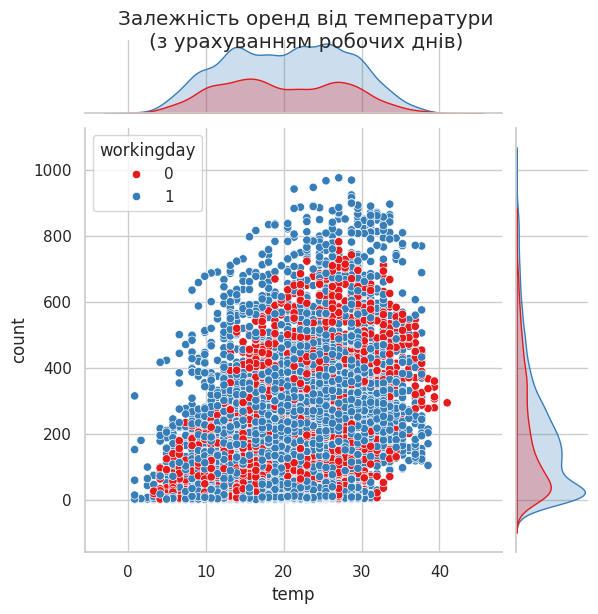

In [16]:
# Побудова jointplot з розбивкою по робочим/неробочим дням
sns.jointplot(
    data=df,
    x='temp',
    y='count',
    hue='workingday',
    kind='scatter',
    palette='Set1'
)
plt.suptitle("Залежність оренд від температури\n(з урахуванням робочих днів)", y=1.02)
plt.show()

#Що показують графіки по краях?
Графік зверху — це розподіл температури (temp) окремо для робочих (синій) і неробочих (червоний) днів.

Показує, що температура в обох типах днів розподілена схоже, але у робочі дні трохи більше спостережень при середніх значеннях.

Графік праворуч — це розподіл кількості оренд (count) для обох типів днів.

Помітно, що у робочі дні (синій) значення оренд вищі: пік розподілу зміщений до 400–600.

У неробочі дні (червоний) оренди загалом нижчі, з максимумом ближче до 200–300.

#Чи є різниця у поведінці користувачів у робочий і неробочий день?
Так, є. Основні спостереження:

Рівень оренди вищий у робочі дні.

Більшість синіх точок (робочі дні) сконцентровані вище на осі count.

Можливо, це пов'язано з поїздками на роботу, навчання тощо.

У вихідні дні (червоні точки) кількість оренд, як правило, нижча.

Але при високій температурі оренд все одно чимало — ймовірно, для прогулянок або відпочинку.

У теплі дні кількість оренд зростає в обох випадках.

Помітна позитивна кореляція між temp і count.